In [1]:
import os
from collections import OrderedDict
import logging

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('font',size=13)
matplotlib.rc('legend', numpoints=1)
# Seaborn color cycle
from cycler import cycler
color_cycle = [u'#4c72b0', u'#55a868', u'#c44e52', u'#8172b2', u'#ccb974', u'#64b5cd']
matplotlib.rcParams['axes.prop_cycle'] = cycler("color", color_cycle)

import numpy as np
import lsst.afw.table as afwTable

import lsst.log as log
import lsst.meas.deblender
from lsst.meas.deblender import nmf
import lsst.meas.deblender.utils as debUtils

logger = logging.getLogger("lsst.meas.deblender")
logger.setLevel(logging.INFO)
log.setLevel("", log.INFO)

# Load the data

In [2]:
dataPath = os.path.abspath(os.path.join(os.path.dirname(os.path.realpath('__file__')), '..','data', 'sim_data'))
filters = ["g","r", "i","z",'y']
imgFilename = os.path.join(dataPath, "test2/{0}_{1}.fits")
catFilename = os.path.join(dataPath, "test2/det_merge.fits")
simFilename = os.path.join(dataPath, "test2/catalog_true.fits")

mcCalexp = nmf.MulticolorCalExp(filters, imgFilename, catFilename, simFilename)

INFO:lsst.meas.deblender:Loading filter g
INFO:lsst.meas.deblender:Loading filter r
INFO:lsst.meas.deblender:Loading filter i
INFO:lsst.meas.deblender:Loading filter z
INFO:lsst.meas.deblender:Loading filter y
INFO:lsst.meas.deblender:Total parents: 41
INFO:lsst.meas.deblender:Unblended sources: 25
INFO:lsst.meas.deblender:Sources with multiple peaks: 16


# Select a Parent object and initialize it

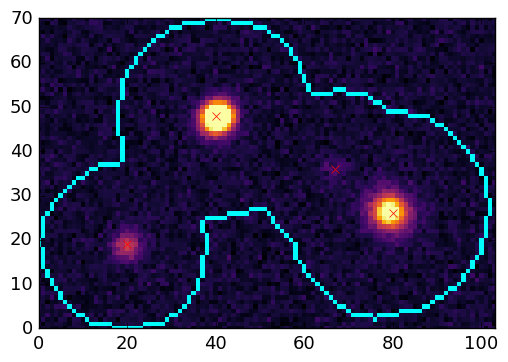

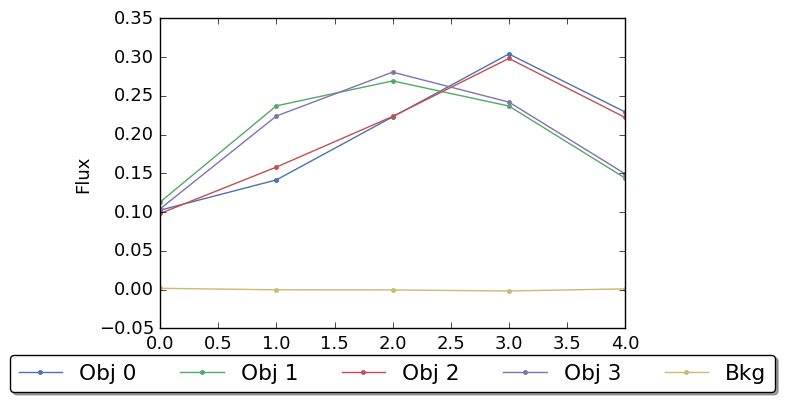

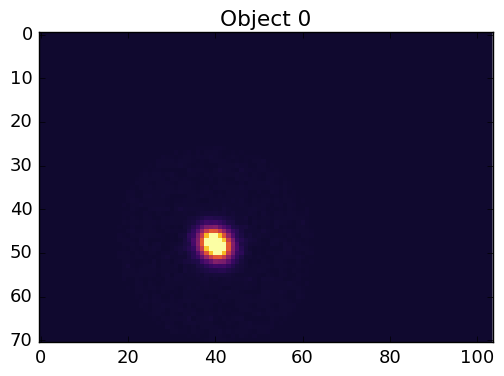

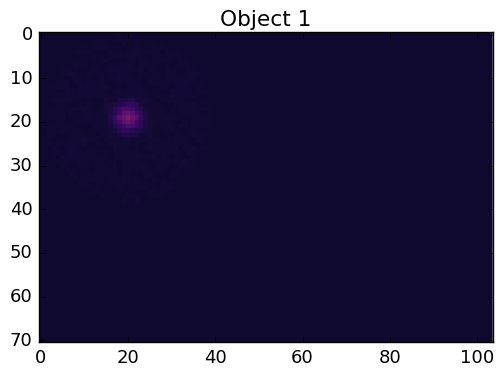

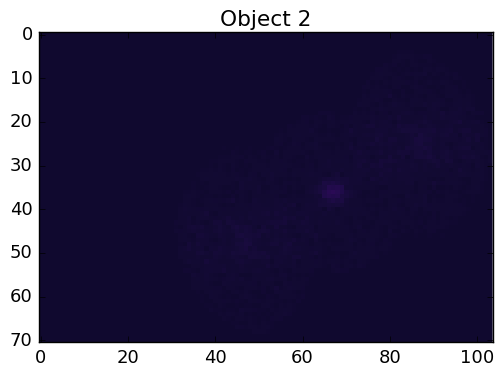

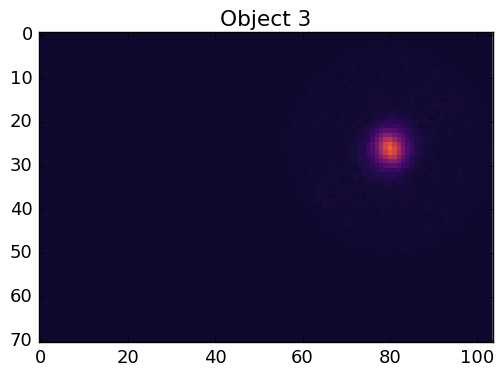

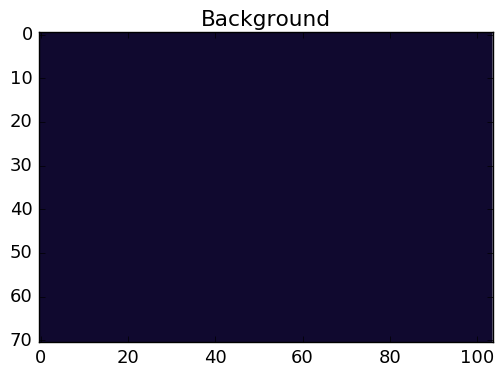

In [3]:
mcCalexp.getParentFootprint(0, mcCalexp.mergedTable["peaks"]==4, filt='r')
mcCalexp.initNMFParams(includeBkg=True);

# Compare the initial templates to the simulated data

INFO:lsst.meas.deblender:Object 0 at (438,438)
INFO:lsst.meas.deblender:Filter g: flux=145.5, real=151.6, error=4.04%
INFO:lsst.meas.deblender:Filter r: flux=200.9, real=210.0, error=4.29%
INFO:lsst.meas.deblender:Filter i: flux=316.4, real=329.5, error=3.96%
INFO:lsst.meas.deblender:Filter z: flux=431.8, real=448.2, error=3.67%
INFO:lsst.meas.deblender:Filter y: flux=325.4, real=338.3, error=3.82%
INFO:lsst.meas.deblender:Object 1 at (418,418)
INFO:lsst.meas.deblender:Filter g: flux=26.1, real=19.0, error=37.57%
INFO:lsst.meas.deblender:Filter r: flux=54.7, real=42.7, error=28.23%
INFO:lsst.meas.deblender:Filter i: flux=62.2, real=46.9, error=32.60%
INFO:lsst.meas.deblender:Filter z: flux=54.7, real=41.3, error=32.26%
INFO:lsst.meas.deblender:Filter y: flux=33.2, real=25.4, error=30.84%
INFO:lsst.meas.deblender:Object 2 at (465,465)
INFO:lsst.meas.deblender:Filter g: flux=34.3, real=6.4, error=435.32%
INFO:lsst.meas.deblender:Filter r: flux=55.2, real=11.0, error=402.44%
INFO:lsst.mea

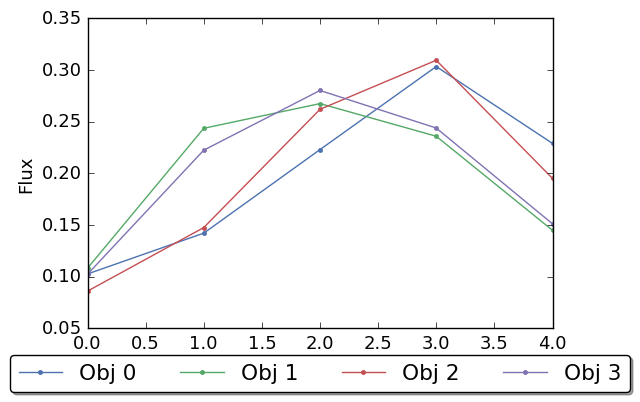

In [4]:
fp = mcCalexp.footprint
W = mcCalexp.initW
H = mcCalexp.initH
realTable = mcCalexp.simTable
matches = nmf.compareMeasToSim(fp, W, H, realTable, filters, includeBkg=False)
simW = np.array([[match['flux_'+f] for f in filters] for match in matches]).T
nmf.plotSeds(simW/np.sum(simW, axis=0), includeBkg=False)

# Run the deblender with a Lee Seung mutliplicative update

INFO:lsst.meas.deblender:Filter g
INFO:lsst.meas.deblender:Pixel range: 0.0 to 12.7806969881
INFO:lsst.meas.deblender:Max difference: 0.334578896286
INFO:lsst.meas.deblender:Residual difference 0.0%
INFO:lsst.meas.deblender:Filter r
INFO:lsst.meas.deblender:Pixel range: 0.0 to 12.7806969881
INFO:lsst.meas.deblender:Max difference: 0.446309119266
INFO:lsst.meas.deblender:Residual difference 0.1%
INFO:lsst.meas.deblender:Filter i
INFO:lsst.meas.deblender:Pixel range: 0.0 to 12.7806969881
INFO:lsst.meas.deblender:Max difference: 0.359946539525
INFO:lsst.meas.deblender:Residual difference 0.1%
INFO:lsst.meas.deblender:Filter z
INFO:lsst.meas.deblender:Pixel range: 0.0 to 12.7806969881
INFO:lsst.meas.deblender:Max difference: 0.316693020012
INFO:lsst.meas.deblender:Residual difference 0.0%
INFO:lsst.meas.deblender:Filter y
INFO:lsst.meas.deblender:Pixel range: 0.0 to 12.7806969881
INFO:lsst.meas.deblender:Max difference: 0.325113233113
INFO:lsst.meas.deblender:Residual difference 0.0%
INFO:

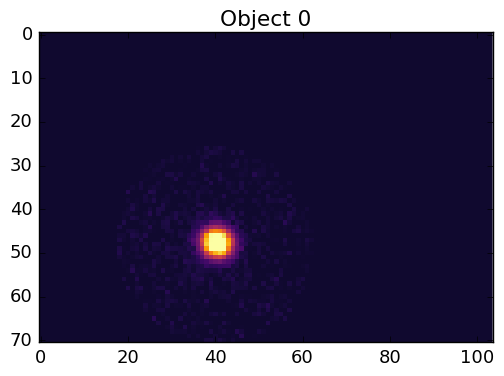

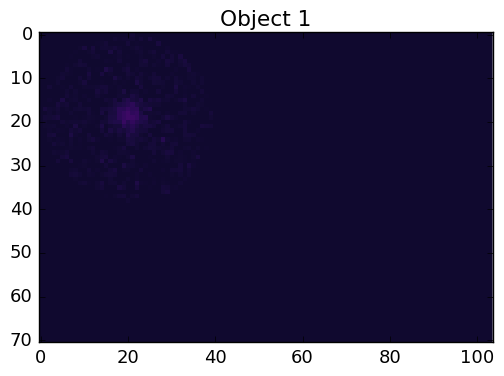

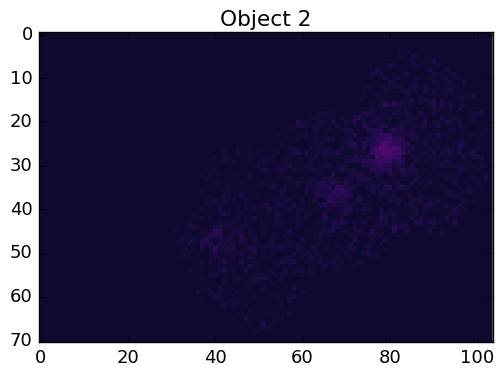

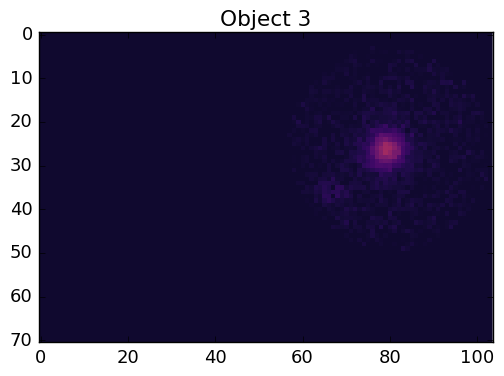

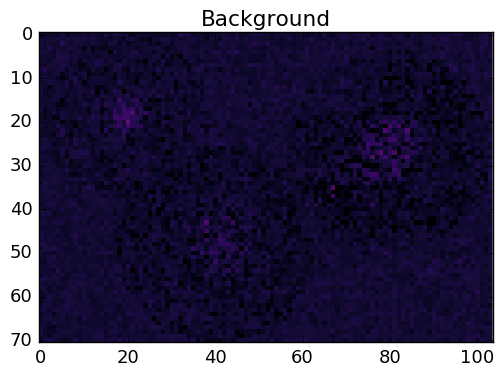

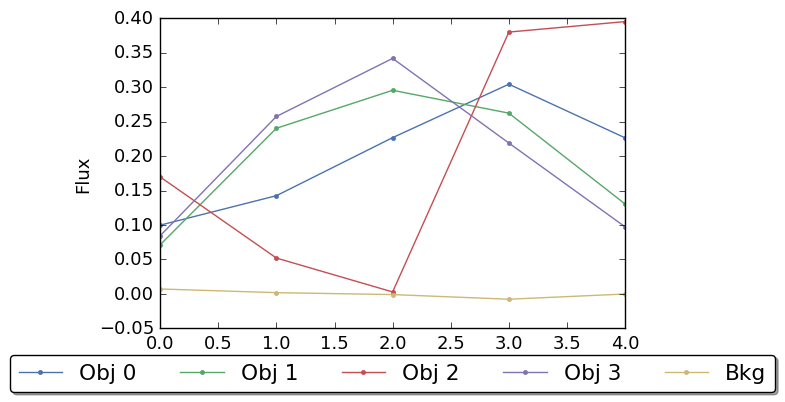

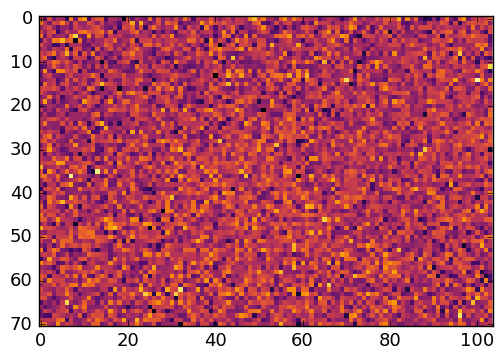

In [5]:
W,H = mcCalexp.deblend(steps=1000)

# Now invoke symmetry

This does not work well yet

INFO:lsst.meas.deblender:Filter g
INFO:lsst.meas.deblender:Pixel range: 0.0 to 12.7806969881
INFO:lsst.meas.deblender:Max difference: 0.297586958702
INFO:lsst.meas.deblender:Residual difference 0.1%
INFO:lsst.meas.deblender:Filter r
INFO:lsst.meas.deblender:Pixel range: 0.0 to 12.7806969881
INFO:lsst.meas.deblender:Max difference: 0.445821860523
INFO:lsst.meas.deblender:Residual difference 0.0%
INFO:lsst.meas.deblender:Filter i
INFO:lsst.meas.deblender:Pixel range: 0.0 to 12.7806969881
INFO:lsst.meas.deblender:Max difference: 0.358734335159
INFO:lsst.meas.deblender:Residual difference 0.0%
INFO:lsst.meas.deblender:Filter z
INFO:lsst.meas.deblender:Pixel range: 0.0 to 12.7806969881
INFO:lsst.meas.deblender:Max difference: 0.324473501848
INFO:lsst.meas.deblender:Residual difference 0.0%
INFO:lsst.meas.deblender:Filter y
INFO:lsst.meas.deblender:Pixel range: 0.0 to 12.7806969881
INFO:lsst.meas.deblender:Max difference: 0.327969744234
INFO:lsst.meas.deblender:Residual difference 0.1%
INFO:

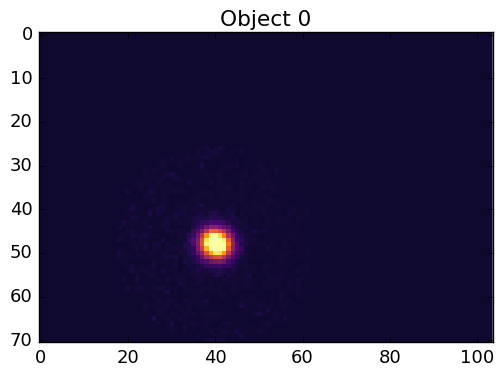

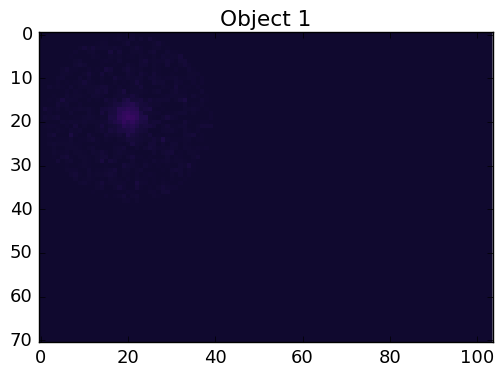

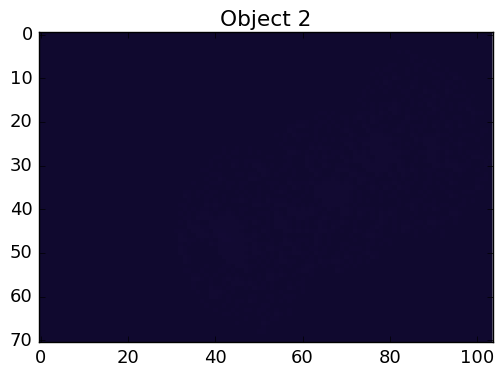

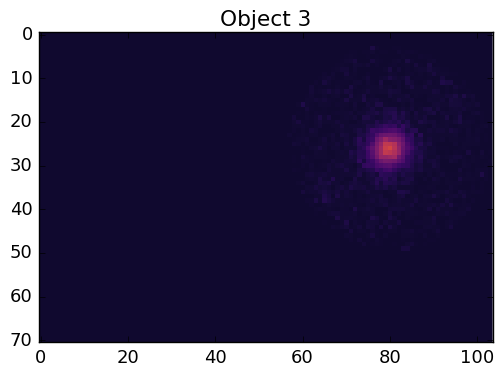

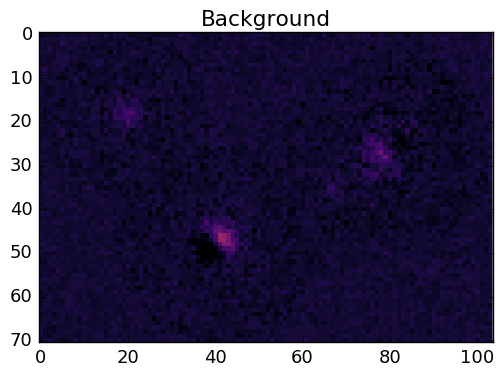

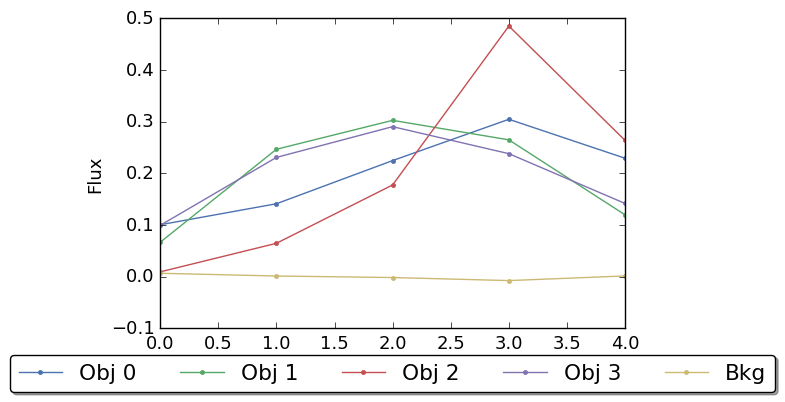

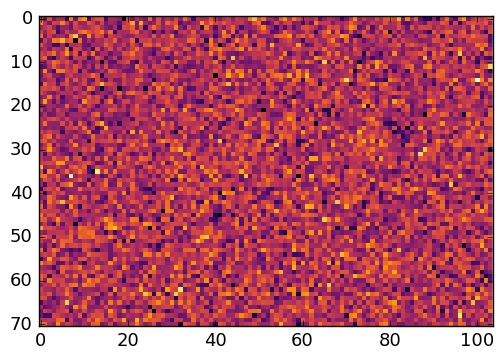

In [11]:
diffOp = mcCalexp.getSymmetryDiffOp()
W,H = mcCalexp.deblend(beta=.01, diffOp=diffOp, steps=100, bkg=.01)

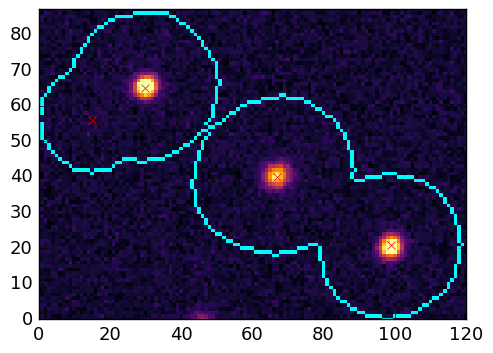

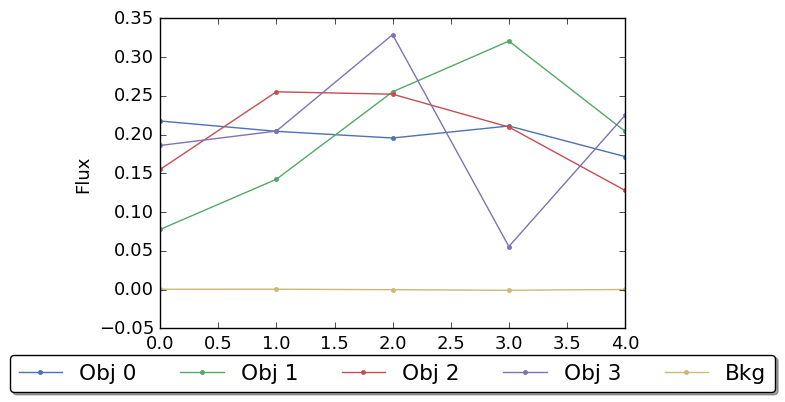

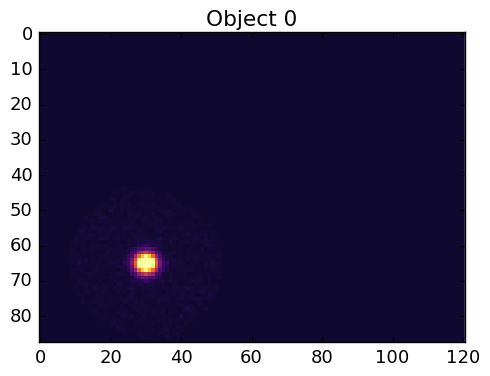

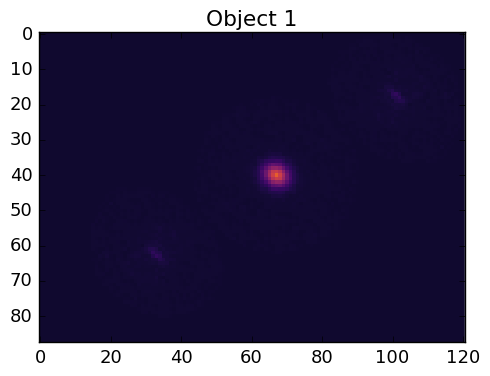

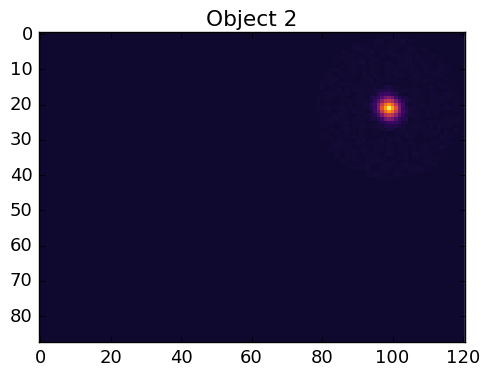

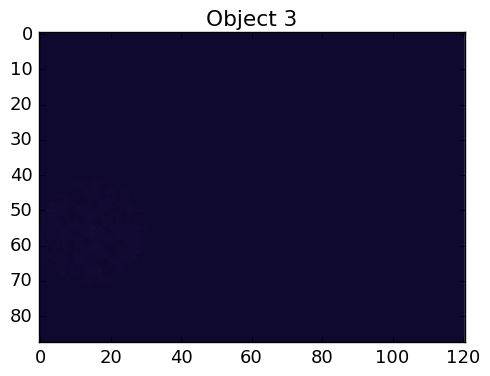

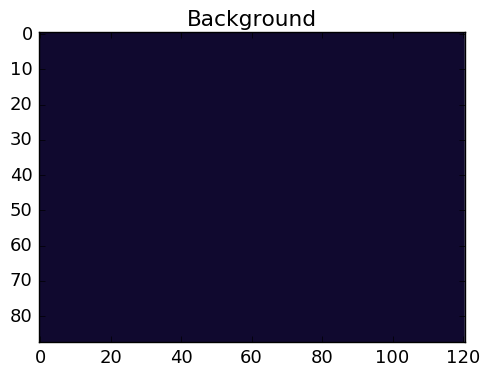

In [12]:
mcCalexp.getParentFootprint(1, mcCalexp.mergedTable["peaks"]==4, filt='r')
mcCalexp.initNMFParams(includeBkg=True);

INFO:lsst.meas.deblender:Filter g
INFO:lsst.meas.deblender:Pixel range: 0.0 to 6.37580192089
INFO:lsst.meas.deblender:Max difference: 0.735371893196
INFO:lsst.meas.deblender:Residual difference 0.2%
INFO:lsst.meas.deblender:Filter r
INFO:lsst.meas.deblender:Pixel range: 0.0 to 6.37580192089
INFO:lsst.meas.deblender:Max difference: 0.447427004911
INFO:lsst.meas.deblender:Residual difference 0.2%
INFO:lsst.meas.deblender:Filter i
INFO:lsst.meas.deblender:Pixel range: 0.0 to 6.37580192089
INFO:lsst.meas.deblender:Max difference: 0.450523249453
INFO:lsst.meas.deblender:Residual difference 0.0%
INFO:lsst.meas.deblender:Filter z
INFO:lsst.meas.deblender:Pixel range: 0.0 to 6.37580192089
INFO:lsst.meas.deblender:Max difference: 0.357836328413
INFO:lsst.meas.deblender:Residual difference 0.2%
INFO:lsst.meas.deblender:Filter y
INFO:lsst.meas.deblender:Pixel range: 0.0 to 6.37580192089
INFO:lsst.meas.deblender:Max difference: 0.339405007539
INFO:lsst.meas.deblender:Residual difference 0.2%
INFO:

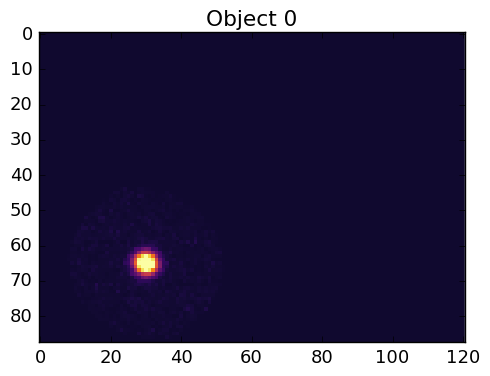

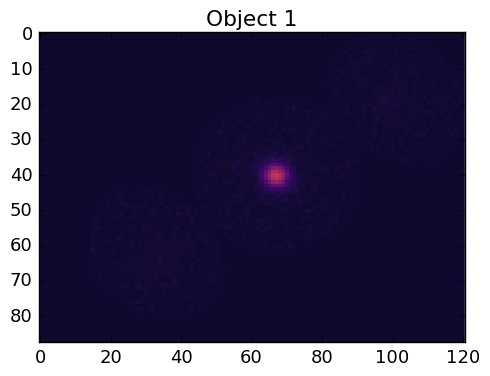

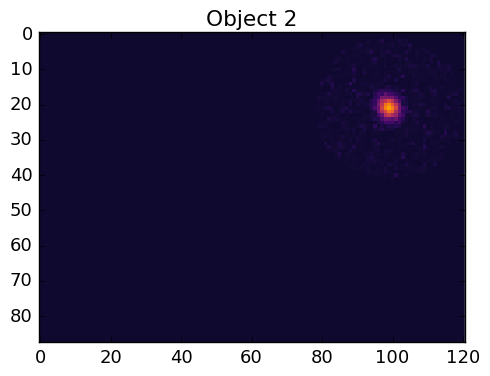

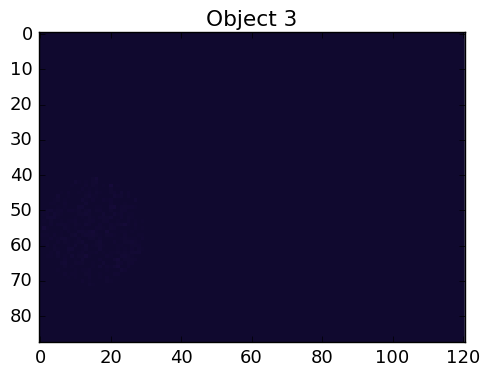

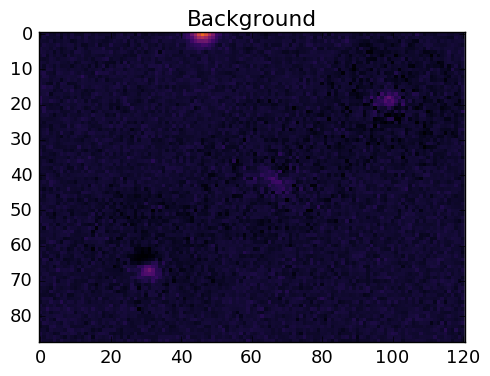

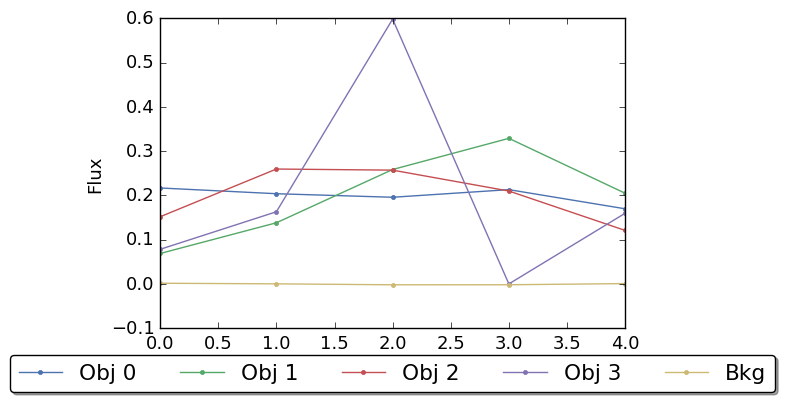

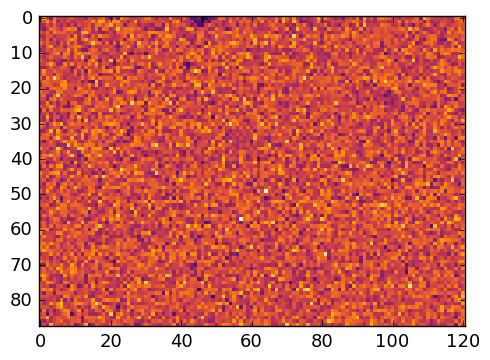

In [13]:
diffOp = mcCalexp.getSymmetryDiffOp()
W,H = mcCalexp.deblend(beta=.01, diffOp=diffOp, steps=100, bkg=.01)